In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
# Working with the European Social Survey data again.
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors
y = df['partner'] -1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0]*0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [28]:
# Making 500 iterations, use 2-deep trees, set our loss function
params = {'n_estimators': 750, 
         'max_depth': 4,
         'loss': 'deviance',
         'subsample': .5}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # What is this syntax?
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins = True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0,1] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1,0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0,1] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1,0] / table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.016503000545553738
Percent Type II errors: 0.08756137479541735

Test set accuracy:
Percent Type I errors: 0.1116564417177914
Percent Type II errors: 0.16932515337423312


In [ ]:
from sklearn.grid_search import grid_search

param_grid = [
    {'n_estimators': [250, 500, 750, 1000],
    'max_depth': [2, 3, 4],
    'subsample': [.25, .5, .75]}
]

clf2 = ensemble.GradientBoostingClassifier(**param_grid)

In [ ]:
#Choose all predictors except target & IDcols predictors = 
[x for x in train.columns if x not in [target, IDcol]] 
param_test1 = {'n_estimators':range(20,81,10)} 
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
    learning_rate=0.1, 
    min_samples_split=500,
    min_samples_leaf=50,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8,
    random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc',iid=False, cv=5) 

In [12]:
print(table_test)

col_0    0.0  1.0  All
partner               
0.0      454   51  505
1.0      151  159  310
All      605  210  815


In [29]:
x = 1 - (test_tI_errors + test_tII_errors)

print('Testing accuracy is: {}'.format(x))

Testing accuracy is: 0.7190184049079755


In [4]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=10)

array([ 0.7622549 ,  0.7120098 ,  0.71691176,  0.72760736,  0.77272727,
        0.76904177,  0.72727273,  0.74447174,  0.76412776,  0.74692875])

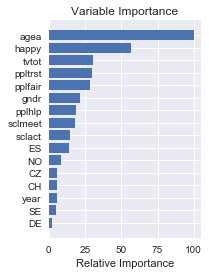

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100 *(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5 #what is this doing?
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# The challenge

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


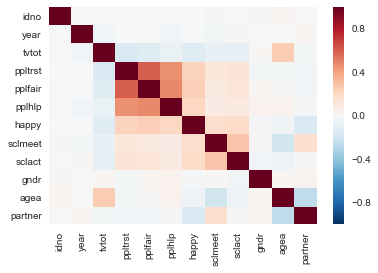

In [14]:
sns.heatmap(df.corr())

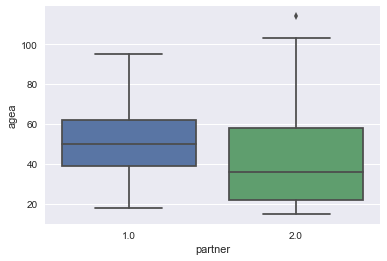

In [8]:
sns.boxplot(x = 'partner', y = 'agea', data = df)

In [16]:
ensemble.GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)